In [1]:
import polars as pl
from simulation.hierarchy import ActionHierarchy, ProductHierarchy
from simulation.config import SIMULATION_CONFIG
from simulation.action_transformer import transform_actions

action_hierarchy = ActionHierarchy(
    SIMULATION_CONFIG["ACTION_HIERARCHY"], SIMULATION_CONFIG["ACTION_COSTS"]
)
print(action_hierarchy)
# ActionHierarchy(Nodes: 9, Edges: 8, Roots: [AllActions, NoAction], Leaves: [Marketing_Coffee, Marketing_Cola, Marketing_IcedTea, Marketing_Tea, Marketing_Water]) # Example output

ActionHierarchy(Nodes: 9, Edges: 8, Roots: [AllActions], Leaves: [Marketing_Coffee, Marketing_Cola, Marketing_IcedTea, Marketing_Tea, Marketing_Water])


In [2]:
product_hierarchy = ProductHierarchy(
    SIMULATION_CONFIG["PRODUCT_HIERARCHY"], SIMULATION_CONFIG["PRODUCT_REWARDS"]
)

print(product_hierarchy)
# ActionHierarchy(Nodes: 9, Edges: 8, Roots: [AllActions, NoAction], Leaves: [Marketing_Coffee, Marketing_Cola, Marketing_IcedTea, Marketing_Tea, Marketing_Water]) # Example output

#product_hierarchy.plot() # This will display the plot

ProductHierarchy(Nodes: 8, Edges: 7, Roots: [AllProducts], Leaves: [Coffee, Cola, IcedTea, Tea, Water])


In [3]:
from simulation.population import Population

# This line is correct based on the current Population __init__
population = Population(SIMULATION_CONFIG, product_hierarchy, action_hierarchy)


In [4]:
from simulation.static_policies import RandomPolicy, OptimalPolicy
random_policy = RandomPolicy()
#optimal_policy = OptimalPolicy()

In [5]:
from simulation.engine import Engine
engine = Engine(population = population, choosing_policy = random_policy)

In [6]:
engine.evolve(1)

Starting simulation for 1 steps with RandomPolicy.
Simulating step 1/1...
Step 1 completed. Total reward: 473090.00
Simulation complete.


In [7]:
from simulation.learning_policies import CausalBanditPolicy

In [8]:
causal_bandit = CausalBanditPolicy()

In [9]:
causal_bandit.learn(population, current_step=0)

  Policy: Collected data for step 0. Total history rows: 35029
  Policy: Incrementally training models at step 1...
    Initialized and partially fitted model for product: Coffee
    Initialized and partially fitted model for product: Cola
    Initialized and partially fitted model for product: IcedTea
    Initialized and partially fitted model for product: Tea
    Initialized and partially fitted model for product: Water


C:\Users\Christian\OneDrive\Projecten\numpyro_timeseries\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Christian\OneDrive\Projecten\numpyro_timeseries\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Christian\OneDrive\Projecten\numpyro_timeseries\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Christian\OneDrive\Projecten\numpyro_timeseries\venv\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reache

In [10]:
#causal_bandit.models['Coffee']

In [10]:
test_choices = causal_bandit.choose(population, current_step=0)

In [11]:
test_choices

Marketing_Coffee,Marketing_Cola,Marketing_IcedTea,Marketing_Tea,Marketing_Water,NoAction
f64,f64,f64,f64,f64,f64
7.562233,8.536971,8.45121,8.256797,8.302642,6.82433
8.492594,8.634027,8.838601,8.782991,8.754322,7.226307
8.693806,10.692937,9.842029,8.374786,9.80792,7.789257
7.601986,9.315213,8.83802,8.03968,8.944261,7.019025
7.962075,10.069393,9.071253,8.611792,8.619433,6.901605
…,…,…,…,…,…
8.300321,10.631915,9.4294,8.596524,9.027991,7.315717
8.322786,9.280824,9.098474,8.492592,8.985754,7.241555
7.054578,8.612967,8.441568,7.890991,8.481926,6.51477


In [13]:
X_train = population.X.filter(population.train_set).to_numpy()
y_train = population.y.filter(population.train_set)['Coffee_t'].to_numpy()

X_test = population.X.filter(population.test_set).to_numpy()
y_test = population.y.filter(population.test_set)['Coffee_t'].to_numpy()

X_val = population.X.filter(population.val_set).to_numpy()
y_val = population.y.filter(population.val_set)['Coffee_t'].to_numpy()

w_train = population.ipw[population.train_set]
w_test = population.ipw[population.test_set]

clf = causal_bandit.models['Coffee']

In [14]:
y_pred_proba_sgd = clf.predict_proba(X_test)[:,1]
y_true_proba = population.probabilities.filter(population.test_set)['Coffee'].to_numpy()

In [15]:
import lightgbm as lgb
from sklearn.calibration import CalibratedClassifierCV

lgbm_clf = lgb.LGBMClassifier(objective='binary', random_state=42)

calibrated_clf = CalibratedClassifierCV(lgbm_clf, method="isotonic", cv=5)

calibrated_clf.fit(X_train, y_train, sample_weight=w_train)

y_pred_proba_lgbm = calibrated_clf.predict_proba(X_test)[:,1]

C:\Users\Christian\OneDrive\Projecten\numpyro_timeseries\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Christian\OneDrive\Projecten\numpyro_timeseries\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Christian\OneDrive\Projecten\numpyro_timeseries\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Christian\OneDrive\Projecten\numpyro_timeseries\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Christian\OneDrive\Projecten\numpyro_timeseries\venv\Lib\site-packages\

In [16]:
population.config["GROUND_TRUTH_WEIGHTS"]

{'Coffee': {'intercept': -1,
  'X': {'customer_type_B': 0.3, 'region_east': 0.4},
  'A': {'Marketing_Coffee': 1.0, 'Group_HotBeverage': 0.5},
  'interaction': {}},
 'Tea': {'intercept': -1,
  'X': {'customer_type_B': 0.3, 'region_east': 0.4},
  'A': {'Marketing_Tea': 1.0, 'Group_HotBeverage': 0.5},
  'interaction': {}},
 'IcedTea': {'intercept': -1,
  'X': {'customer_type_B': 0.3, 'region_east': 0.4},
  'A': {'Group_ColdBeverage': 0.5, 'Marketing_IcedTea': 1.0},
  'interaction': {}},
 'Water': {'intercept': -1,
  'X': {'customer_type_B': 0.3, 'region_east': 0.4},
  'A': {'Marketing_Water': 1.0, 'Group_ColdBeverage': 0.5},
  'interaction': {}},
 'Cola': {'intercept': -1,
  'X': {'customer_type_B': 0.3, 'region_east': 0.4},
  'A': {'Group_ColdBeverage': 0.5, 'Marketing_Cola': 1.0},
  'interaction': {}}}

In [12]:
test_df = pl.DataFrame({"intercept": [1,1,1,1,1],
            "customer_type_B": [1,0,1,0,1],
            "region_east": [0,1,0,1,0],
            "Marketing_Coffee":[1,0,0,0,0],
            "Group_HotBeverage": [1,1,0,0,0],
            "Marketing_Tea": [0,1,0,0,0],
            "Group_ColdBeverage": [0,0,1,1,1],
            "Marketing_Water": [0,0,1,0,0],
            "Marketing_IcedTea": [0,0,0,1,0],
            "Marketing_Cola": [0,0,0,0,1]})
#test_df

In [17]:
-1+0.4+0.5+1

0.9

In [13]:
from simulation.ground_truth import create_ground_truth_function

In [14]:
ground_truth = create_ground_truth_function(population.config)

In [15]:
ground_truth(test_df)

Coffee,Tea,IcedTea,Water,Cola
f32,f32,f32,f32,f32
0.8,-0.2,-0.7,-0.7,-0.7
-0.1,0.9,-0.6,-0.6,-0.6
-0.7,-0.7,-0.2,0.8,-0.2
-0.6,-0.6,0.9,-0.1,-0.1
-0.7,-0.7,-0.2,-0.2,0.8


In [16]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()

# calibrated_clf = CalibratedClassifierCV(lgbm_clf, method="isotonic", cv=5)

lr_clf.fit(X_train, y_train, sample_weight=w_train)
#lr_clf.fit(X_train, y_train)

y_pred_proba_lr = calibrated_clf.predict_proba(X_test)[:,1]



C:\Users\Christian\OneDrive\Projecten\numpyro_timeseries\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Christian\OneDrive\Projecten\numpyro_timeseries\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Christian\OneDrive\Projecten\numpyro_timeseries\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Christian\OneDrive\Projecten\numpyro_timeseries\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\Christian\OneDrive\Projecten\numpyro_timeseries\venv\Lib\site-packages\

In [17]:
import seaborn as sns

<Axes: >

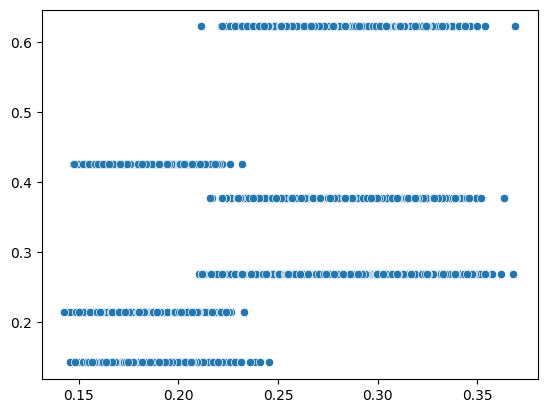

In [18]:
sns.scatterplot(x=y_pred_proba_sgd, y=y_true_proba)

<Axes: >

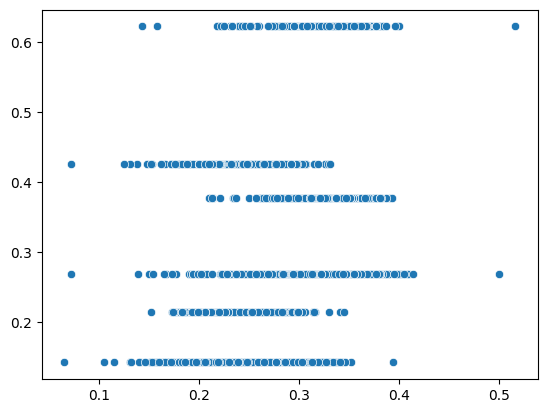

In [19]:
sns.scatterplot(x=y_pred_proba_lr, y=y_true_proba)

<Axes: >

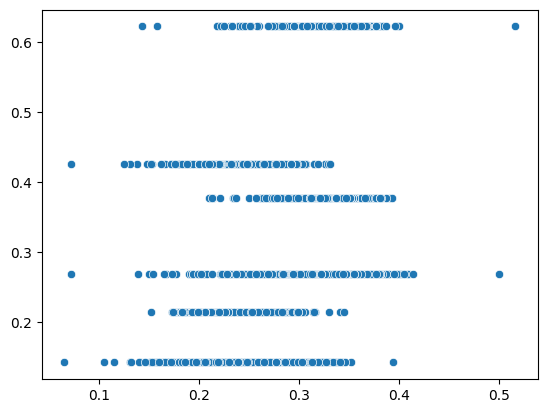

In [20]:
sns.scatterplot(x=y_pred_proba_lgbm, y=y_true_proba)

<Axes: >

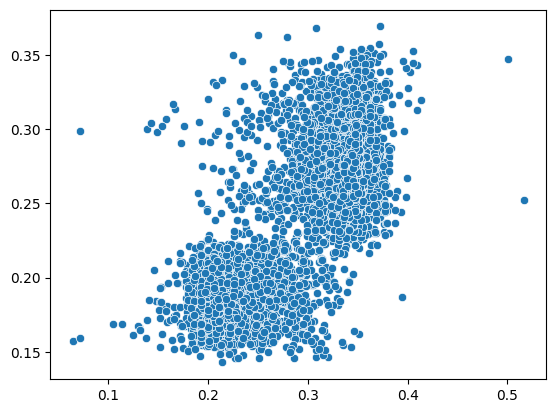

In [21]:
sns.scatterplot(x=y_pred_proba_lgbm, y=y_pred_proba_sgd)

In [22]:
import numpy as np

In [31]:
X_corr = population.X.to_pandas().corr()

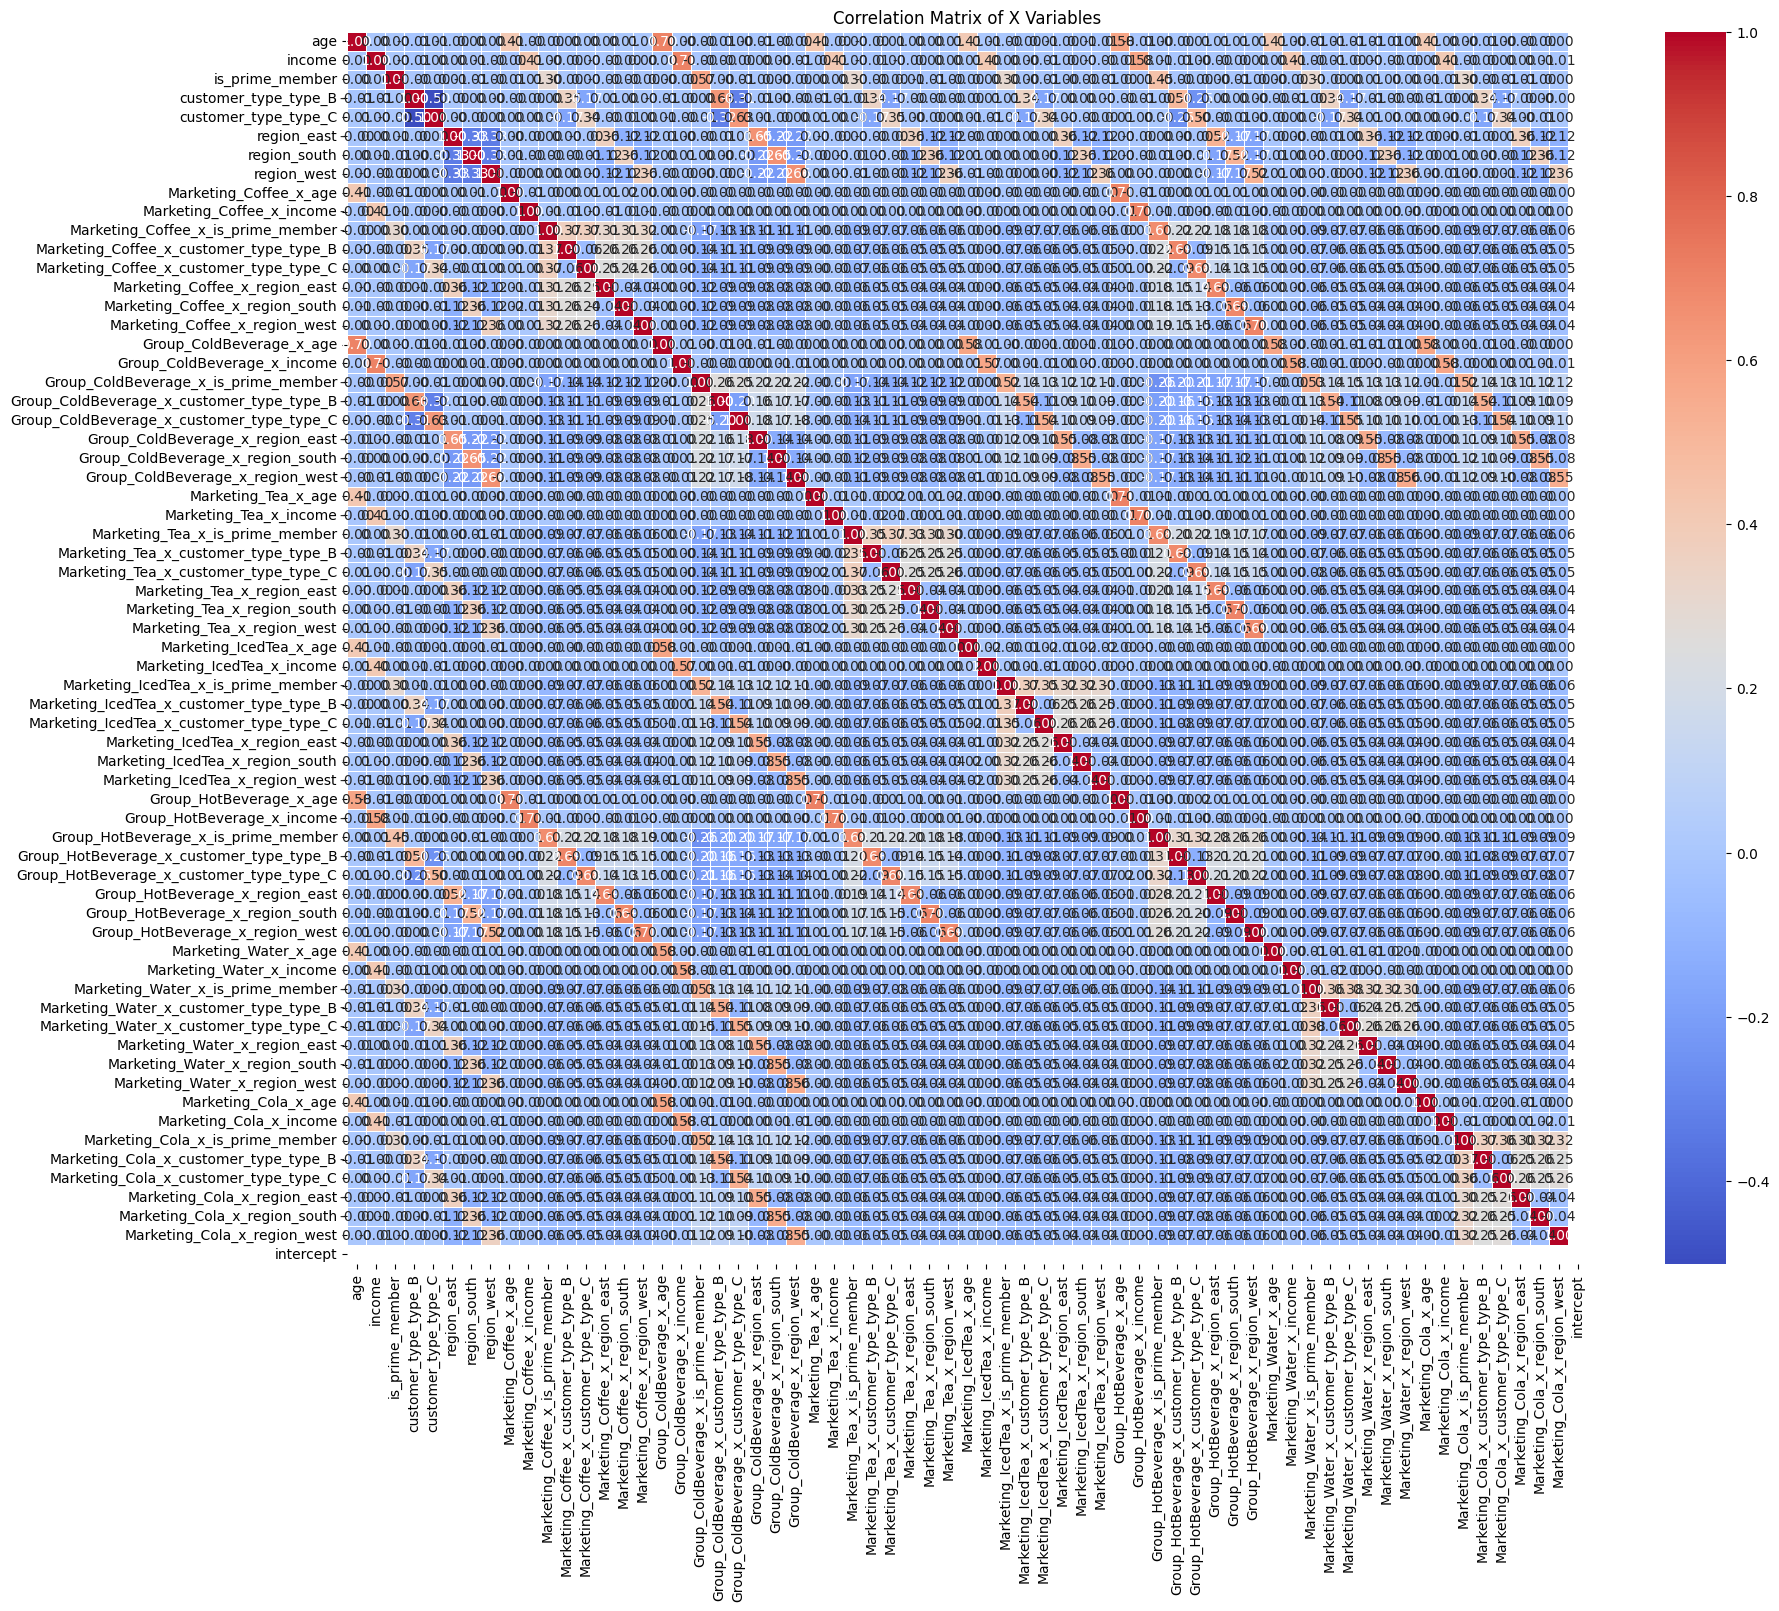

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 16))
sns.heatmap(X_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of X Variables')
plt.show()

<Axes: ylabel='Count'>

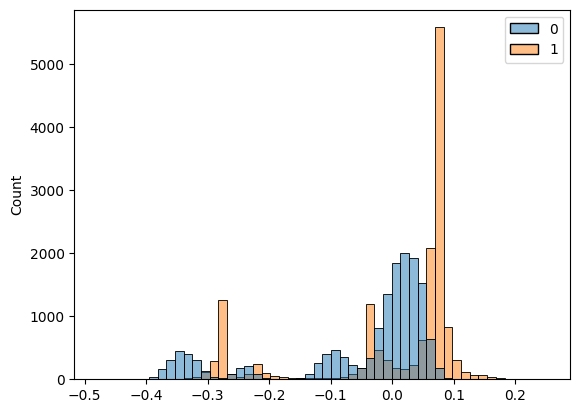

In [23]:
sns.histplot(data = [y_pred_proba_sgd - y_true_proba, y_pred_proba_lgbm - y_true_proba] , bins = 52)

In [24]:
data = [y_pred_proba_sgd - y_true_proba, y_pred_proba_lgbm - y_true_proba]

print(f"Mean SGD {np.mean(data[0])}, SD SGD {np.std(data[0])}")
print(f"Mean LGBM {np.mean(data[1])}, SD LGBM {np.std(data[1])}")

Mean SGD -0.04995234014840293, SD SGD 0.12657618117032582
Mean LGBM 0.0018878649577750157, SD LGBM 0.12531755662477792


<Axes: ylabel='Count'>

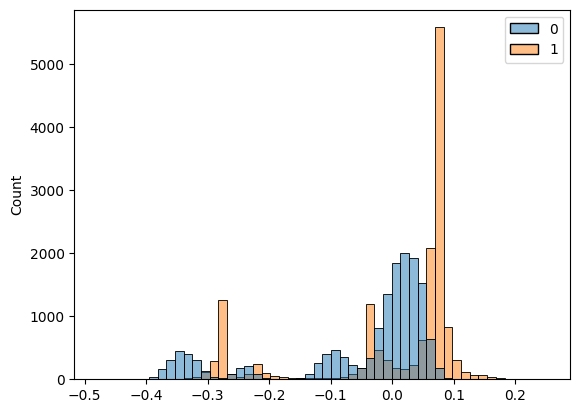

In [25]:
sns.histplot(data = [y_pred_proba_sgd - y_true_proba, y_pred_proba_lgbm - y_true_proba] , bins = 52)

<Axes: >

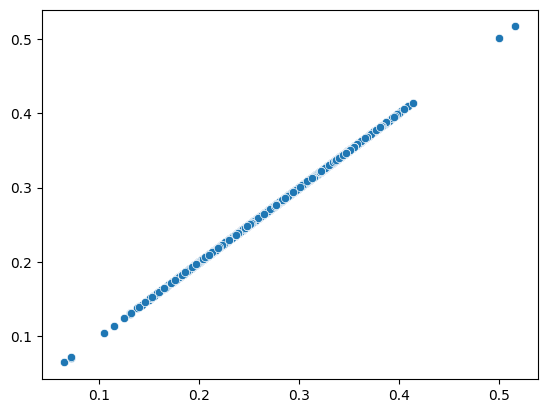

In [26]:
sns.scatterplot(x=y_pred_proba_lgbm, y=y_pred_proba_lr)

In [12]:
def arg_max_horizontal(*columns: pl.Expr) -> pl.Expr:
    return (
        pl.concat_list(columns)
        .list.arg_max()
        .replace_strict({i: col_name for i, col_name in enumerate(columns)})
    )


test_df = pl.DataFrame({
    "row_id": [1, 2, 3, 4, 5, 6],
    "col_A": [10, 50, 30, 70, 20, 10],
    "col_B": [20, 10, 40, 50, 80, 10],
    "col_C": [30, 20, 10, 60, 40, 50],
    "col_D": [15, 60, 25, 40, 90, 50], # Adding a tie with col_C for row 6
})


In [15]:
test_df

row_id,col_A,col_B,col_C,col_D
i64,i64,i64,i64,i64
1,10,20,30,15
2,50,10,20,60
3,30,40,10,25
4,70,50,60,40
5,20,80,40,90
6,10,10,50,50


In [15]:
test_df.select(pl.sum_horizontal(test_df)).to_series().alias('dkjhdsfkhjdfskhjdfshjk')

dkjhdsfkhjdfskhjdfshjk
i64
76
142
108
224
235
126


In [40]:
selection = arg_max_horizontal(*test_df.columns)

test_df.select(selection)

row_id
str
"""col_C"""
"""col_D"""
"""col_B"""
"""col_A"""
"""col_D"""
"""col_C"""


In [44]:
population.action_columns

['Marketing_Coffee',
 'Group_ColdBeverage',
 'Marketing_Tea',
 'Marketing_IcedTea',
 'Group_HotBeverage',
 'Marketing_Water',
 'Marketing_Cola']

In [23]:
# Extract coefficients and intercept

feature_names = population.X_variables
coefficients = clf.coef_
intercept = clf.intercept_

print("Coefficients:")
# For binary classification, coef_ is (1, n_features), so we take the first row
coef_df = pl.DataFrame([pl.Series(feature_names).alias('Feature'), 
                        pl.Series(coefficients[0]).alias('Coefficient')]
)
coef_df

Coefficients:


Feature,Coefficient
str,f32
"""age""",0.016865
"""income""",-0.026545
"""is_prime_member""",-0.155967
"""customer_type_type_B""",-0.136232
"""customer_type_type_C""",-0.063168
…,…
"""Marketing_Cola_x_customer_type…",0.01159
"""Marketing_Cola_x_region_east""",-0.012406
"""Marketing_Cola_x_region_south""",-0.002913


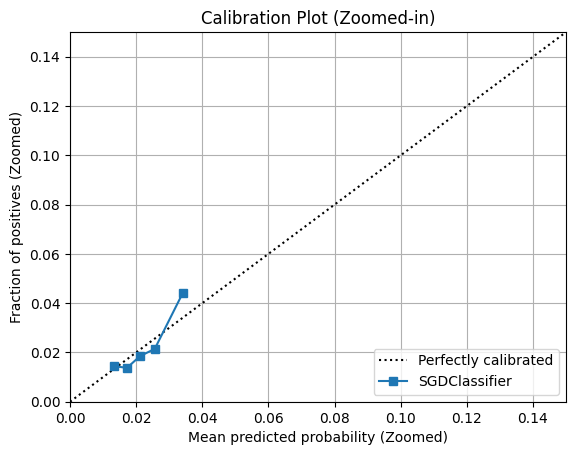

In [24]:
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay

disp = CalibrationDisplay.from_estimator(clf, X_test, y_test, strategy='quantile')

x_lower_limit = 0.0
x_upper_limit = 0.15 # Slightly more than 0.10 to give some breathing room

y_lower_limit = 0.0
y_upper_limit = 0.15 # Keep y-axis consistent with x-axis for calibration plots

# Apply the new limits
disp.ax_.set_xlim(x_lower_limit, x_upper_limit)
disp.ax_.set_ylim(y_lower_limit, y_upper_limit)

# Optional: Add a title or customize further
disp.ax_.set_title('Calibration Plot (Zoomed-in)')
disp.ax_.set_xlabel('Mean predicted probability (Zoomed)')
disp.ax_.set_ylabel('Fraction of positives (Zoomed)')

plt.grid(True)
plt.show()

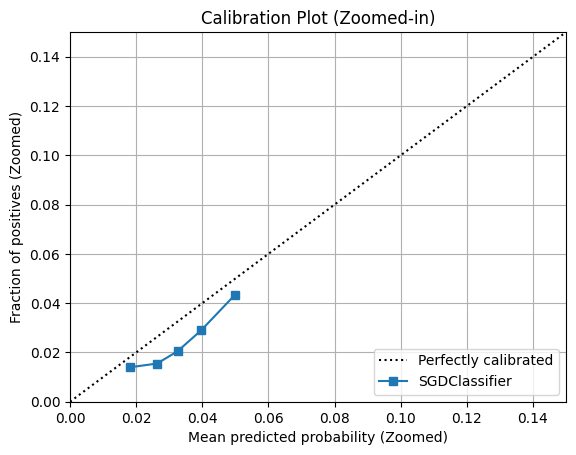

In [19]:
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay

disp = CalibrationDisplay.from_estimator(clf, X_test, y_test, strategy='quantile')

x_lower_limit = 0.0
x_upper_limit = 0.15 # Slightly more than 0.10 to give some breathing room

y_lower_limit = 0.0
y_upper_limit = 0.15 # Keep y-axis consistent with x-axis for calibration plots

# Apply the new limits
disp.ax_.set_xlim(x_lower_limit, x_upper_limit)
disp.ax_.set_ylim(y_lower_limit, y_upper_limit)

# Optional: Add a title or customize further
disp.ax_.set_title('Calibration Plot (Zoomed-in)')
disp.ax_.set_xlabel('Mean predicted probability (Zoomed)')
disp.ax_.set_ylabel('Fraction of positives (Zoomed)')

plt.grid(True)
plt.show()

In [7]:
from simulation.inverse_propensity_weighting import calculate_treatment_probabilities, calculate_adjusted_treatment_probabilities, calculate_truncated_stabilized_ipw

In [8]:
# treatment_probabilities = calculate_treatment_probabilities(new_population)
#treatment_probabilities = calculate_adjusted_treatment_probabilities(population)

In [9]:
ipw = calculate_truncated_stabilized_ipw(population, truncation_lower_bound=0.01, truncation_upper_bound=0.85)
ipw

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 8
[LightGBM] [Info] Start training from score -1.783791
[LightGBM] [Info] Start training from score -1.850714
[LightGBM] [Info] Start training from score -1.792010
[LightGBM] [Info] Start training from score -1.759534
[LightGBM] [Info] Start training from score -1.774902
[LightGBM] [Info] Start training from score -1.792010
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 8
[LightGBM] [Info] Start training from sc

Marketing_Coffee,Marketing_Cola,Marketing_IcedTea,Marketing_Tea,Marketing_Water,NoAction
f64,f64,f64,f64,f64,f64
0.874695,1.122838,0.871162,0.850397,0.799695,0.82377
0.952845,0.997932,1.042492,0.992298,1.003824,1.015468
1.017838,1.089543,0.988614,1.021405,0.889147,1.022002
1.032735,0.999566,1.111771,0.993016,1.046917,0.854166
0.981462,0.966614,1.036379,1.010717,1.046917,0.94029
…,…,…,…,…,…
1.043798,1.097094,1.00756,0.902155,1.046113,0.938051
0.856287,1.122838,0.819271,0.873124,0.828694,0.838508
1.038323,0.894125,1.027044,1.044689,0.996513,1.007532


In [13]:
population.y

Coffee_t,Cola_t,IcedTea_t,Tea_t,Water_t
u8,u8,u8,u8,u8
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0
0,0,0,1,0
…,…,…,…,…
0,0,0,0,0
0,0,0,0,0
0,0,0,0,0


In [12]:
from simulation.inverse_propensity_weighting import lookup_ipw_from_predicted

ipw_score = lookup_ipw_from_predicted(ipw, population._state['A_t'])
ipw_score

ipw
f64
0.799695
1.015468
1.021405
0.854166
0.981462
…
0.902155
1.122838
0.894125


In [14]:
new_population.x_columns

['age',
 'income',
 'is_prime_member',
 'customer_type_type_B',
 'customer_type_type_C',
 'region_east',
 'region_south',
 'region_west']

In [11]:
new_population.eligibility_columns

['eligibility_NoAction',
 'eligibility_Marketing_Coffee',
 'eligibility_Marketing_Tea',
 'eligibility_Marketing_IcedTea',
 'eligibility_Marketing_Water',
 'eligibility_Marketing_Cola']

In [61]:
def calculate_marginal_probabilities(series: pl.Series) -> pl.Series:
    """
    Calculates the marginal probability (relative count) of each unique value in a Polars Series.

    Args:
        series: The input Polars Series.

    Returns:
        A dictionary of frequencies per category
    """
    # Calculate value counts
    counts = series.to_frame().group_by(series).len()

    # Calculate total number of elements
    total_elements = len(observed_actions)

    results = counts.with_columns(counts['len']/total_elements)

    return {key: value for key, value in zip(results['A_t'], results['len'])}

In [83]:
# Stabilize values
treatment_probabilities = treatment_probabilities.with_columns(treatment_probabilities[col]/marginal_prob_map[col] for col in treatment_probabilities.columns)

In [88]:
# Clip values to no min/max values so IPW can be calculated
treatment_probabilities = treatment_probabilities.with_columns(1/treatment_probabilities[col].clip(1e-6, 1e6) for col in treatment_probabilities.columns)

In [90]:
treatment_probabilities

Marketing_Coffee,Marketing_Cola,Marketing_IcedTea,Marketing_Tea,Marketing_Water,NoAction
f64,f64,f64,f64,f64,f64
1.068984,1.013531,0.972718,0.978044,1.01491,0.962117
0.816549,1e6,0.923955,0.811893,0.783776,0.850694
1.051125,0.9368,0.956686,0.990827,1.054763,1.020909
0.661568,0.692336,1e6,1e6,0.707074,0.619018
1e6,0.802113,0.808692,1.019495,0.772209,0.822058
…,…,…,…,…,…
1.018542,1.024548,0.859765,1.021875,1.052572,1.046926
1.0091,1.033442,0.962403,0.985527,1.020604,0.992321
1e6,0.800743,0.862027,0.848591,0.799182,0.880596


In [93]:
# Build a list of expressions for with_columns
expressions = []
for column in treatment_probabilities.columns:
    # Calculate the 1st and 99th quantiles as expressions
    lower_bound = treatment_probabilities[column].quantile(0.01)
    upper_bound = treatment_probabilities[column].quantile(0.85)

    # Clip the column using these bounds and alias it back to the original column name
    expressions.append(
        treatment_probabilities[column].clip(lower_bound, upper_bound)
    )

# Apply the clipping to the DataFrame
clipped_ipw = treatment_probabilities.with_columns(expressions)

In [99]:
clipped_ipw['Marketing_Coffee'].quantile(0.85)

1.056034181928217

In [62]:
# 1. Calculate marginal probabilities of each action
# This assumes 'A_t' column holds the observed action.
observed_actions = new_population._state['A_t']
actions = new_population.action_hierarchy.get_leaves() + ["NoAction"]
n_customers = new_population._state.shape[0]

In [64]:
# Calculate marginal probabilities P(A=a) for each action 'a'
marginal_prob_map = calculate_marginal_probabilities(observed_actions)

marginal_prob_map

{'Marketing_Tea': 0.169,
 'Marketing_Water': 0.16690000000000002,
 'Marketing_Cola': 0.1655,
 'NoAction': 0.1726,
 'Marketing_IcedTea': 0.1632,
 'Marketing_Coffee': 0.1628}

In [ ]:
# Initialize a list to store IPW for each row
ipw_list = []

# Iterate through each row to calculate the stabilized IPW
# This approach is less "Polars-idiomatic" but clear for logic.
# For very large datasets, a join might be more performant, but Polars' row-wise operations are often optimized.
for i in range(n_customers):
    observed_action = observed_actions[i, "A_t"]
    
    # Get the predicted propensity score for the observed action
    propensity_score = adjusted_probabilities[i, observed_action]
    
    # Get the marginal probability for the observed action
    marginal_prob_observed_action = marginal_prob_map.get(observed_action, 0.0)

    # Handle cases where propensity_score is zero or very close to zero
    if propensity_score == 0:
        # If probability of observed action is 0, the weight is effectively infinite.
        # In practice, this means imbalance is extreme. We'll set it to a very large number or let truncation handle it.
        # For robustness, we'll set it to a very small non-zero value for division if not already handled by truncation.
        # Or, for practical purposes in weighting, it often implies severe overlap violation.
        # For this scenario, we'll assign a very large but finite number, which will likely be capped by truncation.
        stabilized_ipw = 1e6 # A very large number to indicate extreme imbalance
    else:
        stabilized_ipw = marginal_prob_observed_action / propensity_score
    
    ipw_list.append(stabilized_ipw)

stabilized_ipw_series = pl.Series("IPW", ipw_list, dtype=pl.Float64)
stabilized_ipw_df = pl.DataFrame({"IPW": stabilized_ipw_series})

# 2. Apply Truncation to the Stabilized Weights
# Determine actual lower and upper bounds based on percentile or fixed value
if 0 < truncation_lower_bound < 1:
    lower_bound_val = stabilized_ipw_df["IPW"].quantile(truncation_lower_bound, interpolation="linear")
else:
    lower_bound_val = truncation_lower_bound

if 0 < truncation_upper_bound < 1:
    upper_bound_val = stabilized_ipw_df["IPW"].quantile(truncation_upper_bound, interpolation="linear")
else:
    upper_bound_val = truncation_upper_bound

# Apply truncation
final_ipw_df = stabilized_ipw_df.with_columns(
    pl.col("IPW").clip(lower=lower_bound_val, upper=upper_bound_val)
)

In [ ]:
def calculate_truncated_stabilized_ipw(
    population: Population,
    adjusted_probabilities: pl.DataFrame,
    truncation_lower_bound: float = 0.01, # e.g., 1st percentile or 0.01
    truncation_upper_bound: float = 0.99, # e.g., 99th percentile or 0.99
) -> pl.DataFrame:
    """
    Calculates truncated and stabilized inverse propensity weights (IPW).

    Args:
        population (Population): The Population object containing the state
                                 with observed actions ('A_t').
        adjusted_probabilities (pl.DataFrame): A Polars DataFrame where each column
                                               represents an action and contains
                                               the adjusted probability of observing
                                               that action for each individual.
        truncation_lower_bound (float): The lower percentile (e.g., 0.01 for 1st percentile)
                                        or a fixed minimum value for truncating weights.
                                        If 0 < truncation_lower_bound < 1, it's treated as a percentile.
                                        Otherwise, it's a fixed lower bound for the weights.
        truncation_upper_bound (float): The upper percentile (e.g., 0.99 for 99th percentile)
                                        or a fixed maximum value for truncating weights.
                                        If 0 < truncation_upper_bound < 1, it's treated as a percentile.
                                        Otherwise, it's a fixed upper bound for the weights.

    Returns:
        pl.DataFrame: A Polars DataFrame with a single column 'IPW' containing
                      the truncated and stabilized inverse propensity weights.
    """
    observed_actions = population._state.select(pl.col("A_t"))

    # 1. Calculate marginal probabilities of each action
    # This assumes 'A_t' column holds the observed action.
    actions = population.action_hierarchy.get_leaves() + ["NoAction"]
    n_customers = population._state.shape[0]
    
    # Calculate marginal probabilities P(A=a) for each action 'a'
    marginal_probabilities = observed_actions.group_by("A_t").len().with_columns(
        (pl.col("len") / n_customers).alias("marginal_prob")
    ).select(pl.col("A_t"), pl.col("marginal_prob")).collect() # Collect to ensure proper DataFrame for lookup

    # Map marginal probabilities to a dictionary for faster lookup
    marginal_prob_map = {row["A_t"]: row["marginal_prob"] for row in marginal_probabilities.iter_rows()}

    # Initialize a list to store IPW for each row
    ipw_list = []

    # Iterate through each row to calculate the stabilized IPW
    # This approach is less "Polars-idiomatic" but clear for logic.
    # For very large datasets, a join might be more performant, but Polars' row-wise operations are often optimized.
    for i in range(n_customers):
        observed_action = observed_actions[i, "A_t"]
        
        # Get the predicted propensity score for the observed action
        propensity_score = adjusted_probabilities[i, observed_action]
        
        # Get the marginal probability for the observed action
        marginal_prob_observed_action = marginal_prob_map.get(observed_action, 0.0)

        # Handle cases where propensity_score is zero or very close to zero
        if propensity_score == 0:
            # If probability of observed action is 0, the weight is effectively infinite.
            # In practice, this means imbalance is extreme. We'll set it to a very large number or let truncation handle it.
            # For robustness, we'll set it to a very small non-zero value for division if not already handled by truncation.
            # Or, for practical purposes in weighting, it often implies severe overlap violation.
            # For this scenario, we'll assign a very large but finite number, which will likely be capped by truncation.
            stabilized_ipw = 1e6 # A very large number to indicate extreme imbalance
        else:
            stabilized_ipw = marginal_prob_observed_action / propensity_score
        
        ipw_list.append(stabilized_ipw)

    stabilized_ipw_series = pl.Series("IPW", ipw_list, dtype=pl.Float64)
    stabilized_ipw_df = pl.DataFrame({"IPW": stabilized_ipw_series})

    # 2. Apply Truncation to the Stabilized Weights
    # Determine actual lower and upper bounds based on percentile or fixed value
    if 0 < truncation_lower_bound < 1:
        lower_bound_val = stabilized_ipw_df["IPW"].quantile(truncation_lower_bound, interpolation="linear")
    else:
        lower_bound_val = truncation_lower_bound

    if 0 < truncation_upper_bound < 1:
        upper_bound_val = stabilized_ipw_df["IPW"].quantile(truncation_upper_bound, interpolation="linear")
    else:
        upper_bound_val = truncation_upper_bound

    # Apply truncation
    final_ipw_df = stabilized_ipw_df.with_columns(
        pl.col("IPW").clip(lower=lower_bound_val, upper=upper_bound_val)
    )

    return final_ipw_df